In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import numpy as np

import arviz as az
import pymc as pm

from modules.models.chapter_4 import gaussian_estimation, seven_scientists_estimation, repeated_iq_estimation
from modules.utils import validate_model, visualize_samples

In [4]:
PRPC_KWARGS={
    'samples': 1000
}
SAMPLING_KWARGS={
    'draws': 1000,
    'tune': 2000,
    'target_accept': 0.95
}
POPC_KWARGS={
}

# Gaussian Estimation

Sampling: [measurements, mu, sigma]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 13 seconds.
Sampling: [measurements]


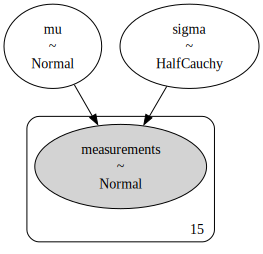

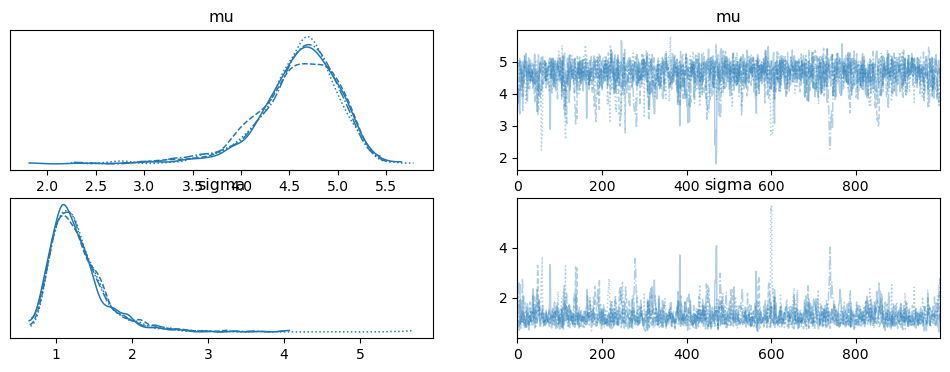

In [6]:
obs_measurements = np.random.normal(
    loc=5,
    scale=1,
    size=15
)
mu_kwargs = {
    'mu': 0,
    'sigma': 1
}
sigma_kwargs = {
    'beta': 25
}
model = gaussian_estimation(
    obs_measurements=obs_measurements,
    mu_kwargs=mu_kwargs,
    sigma_kwargs=sigma_kwargs
)

plate, prpc, trace, popc = validate_model(
    model,
    PRPC_KWARGS,
    SAMPLING_KWARGS,
    POPC_KWARGS
)
plate

/home/penthotal/Desktop/learning_bayes/books/bayesian_cognitive_modelling/modules/utils.py:62: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  axs[0].scatter(
/home/penthotal/Desktop/learning_bayes/books/bayesian_cognitive_modelling/modules/utils.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  axs[2].scatter(


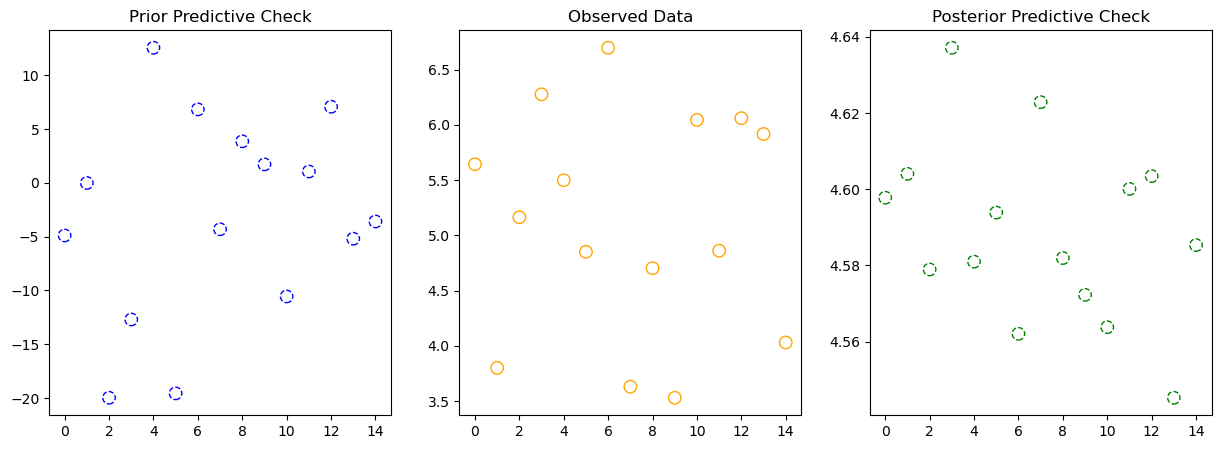

In [7]:
visualize_samples(
    observed=obs_measurements, 
    prpc=prpc.measurements.values.mean(0).mean(0), 
    popc=popc.measurements.values.mean(0).mean(0)
)

# Seven Scientists Estimation (AKA Eteroschedasticity)

/home/penthotal/mambaforge-pypy3/envs/bayes_env/lib/python3.11/site-packages/pymc/data.py:433: UserWarning: The `mutable` kwarg was not specified. Before v4.1.0 it defaulted to `pm.Data(mutable=True)`, which is equivalent to using `pm.MutableData()`. In v4.1.0 the default changed to `pm.Data(mutable=False)`, equivalent to `pm.ConstantData`. Use `pm.ConstantData`/`pm.MutableData` or pass `pm.Data(..., mutable=False/True)` to avoid this warning.
  warnings.warn(
Sampling: [measurements, mu, sigma]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 41 seconds.
There were 78 divergences after tuning. Increase `target_accept` or reparameterize.
Sampling: [measurements]


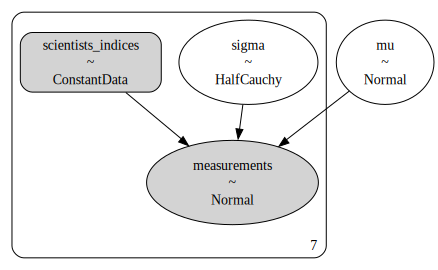

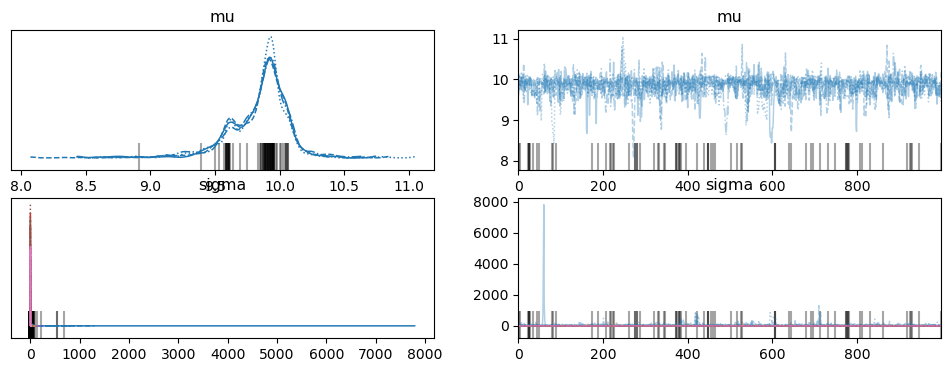

In [12]:
obs_measurements = np.array([-27.020, 3.570, 8.191, 9.898, 9.603, 9.945, 10.056])
mu_kwargs = {
    'mu': 0,
    'sigma': 1
}
sigma_kwargs = {
    'beta': 1
}
model = seven_scientists_estimation(
    obs_measurements=obs_measurements,
    mu_kwargs=mu_kwargs,
    sigma_kwargs=sigma_kwargs
)

plate, prpc, trace, popc = validate_model(
    model,
    PRPC_KWARGS,
    SAMPLING_KWARGS,
    POPC_KWARGS
)
plate

/home/penthotal/Desktop/learning_bayes/books/bayesian_cognitive_modelling/modules/utils.py:62: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  axs[0].scatter(
/home/penthotal/Desktop/learning_bayes/books/bayesian_cognitive_modelling/modules/utils.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  axs[2].scatter(


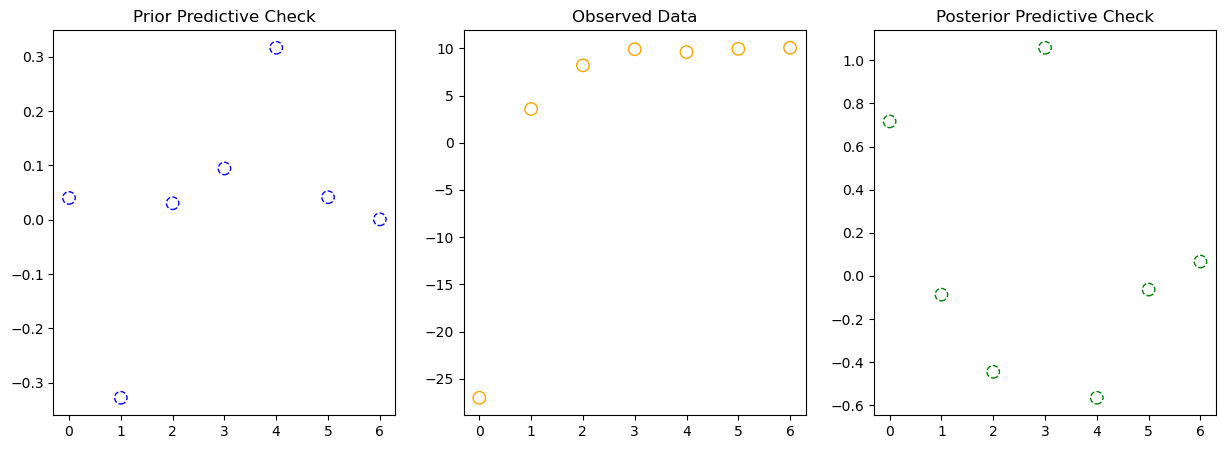

In [11]:
visualize_samples(
    observed=obs_measurements, 
    prpc=prpc['measurements'].values.mean(0).mean(0), 
    popc=popc['measurements'].values.mean(0).mean(0)
)

# IQ Measurements Estimation (AKA Repeated MEasurements Estimation)

Sampling: [measurements, mu, sigma]
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


Sampling 4 chains for 2_000 tune and 1_000 draw iterations (8_000 + 4_000 draws total) took 15 seconds.
Sampling: [measurements]


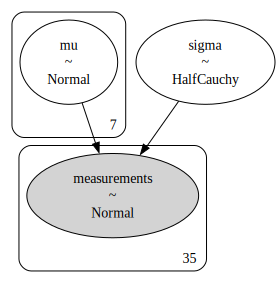

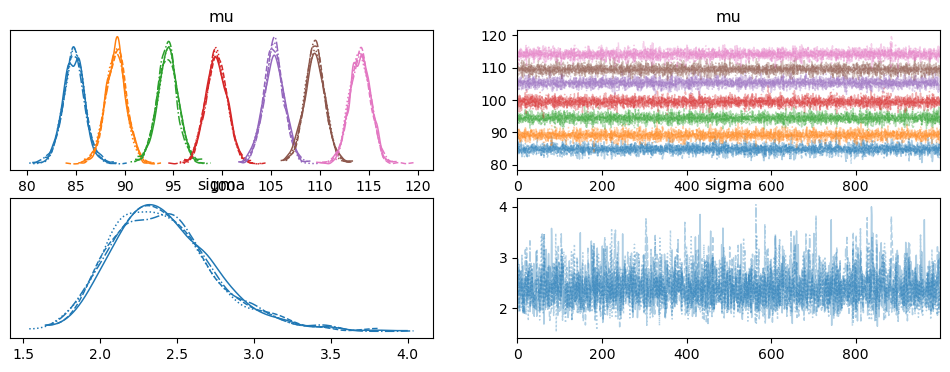

In [13]:
obs_measurements = []
id_ind = []

for ind, dev in enumerate([-15, -10, -5, 0, 5, 10, 15]):
    
    for test in range(5):
        
        id_ind.append(ind)
        obs_measurements.append(
            np.random.normal(
                loc=100+dev,
                scale=2
            )
        )

obs_measurements = np.array(obs_measurements)
id_ind = np.array(id_ind)

mu_kwargs = {
    'mu': 100,
    'sigma': 15
}
sigma_kwargs = {
    'beta': 25
}
model = repeated_iq_estimation(
    obs_measurements=obs_measurements,
    id_ind=id_ind,
    mu_kwargs=mu_kwargs,
    sigma_kwargs=sigma_kwargs
)

plate, prpc, trace, popc = validate_model(
    model,
    PRPC_KWARGS,
    SAMPLING_KWARGS,
    POPC_KWARGS
)
plate

/home/penthotal/Desktop/learning_bayes/books/bayesian_cognitive_modelling/modules/utils.py:62: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  axs[0].scatter(
/home/penthotal/Desktop/learning_bayes/books/bayesian_cognitive_modelling/modules/utils.py:83: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  axs[2].scatter(


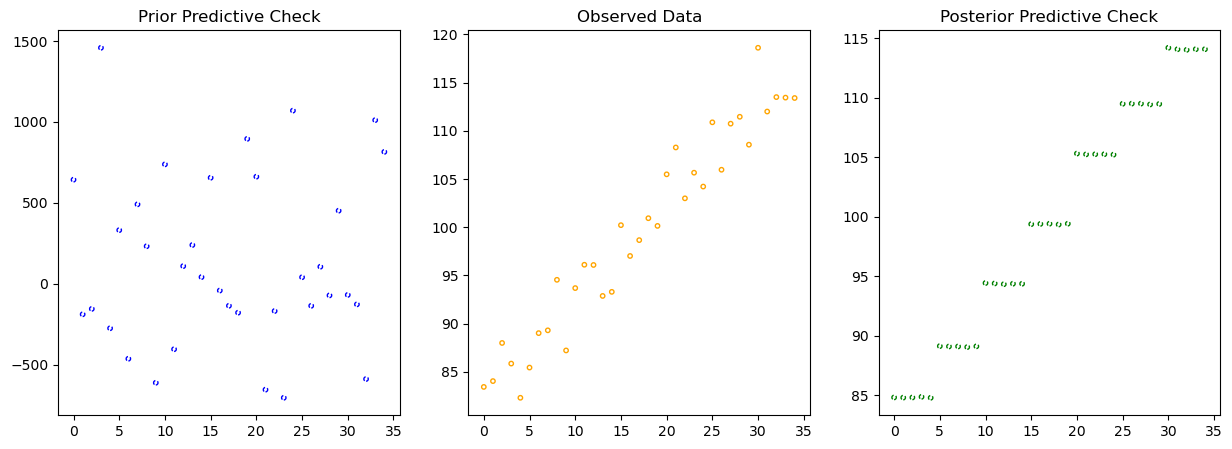

In [14]:
visualize_samples(
    observed=obs_measurements, 
    prpc=prpc['measurements'].values.mean(0).mean(0), 
    popc=popc['measurements'].values.mean(0).mean(0),
    s=10
)